# Experiments - Evolutionary Algorithm TSP

In [1]:
%load_ext autoreload
%autoreload 2
    
import numpy as np
from tsp_evolutionary_algorithm import TSPEvolutionaryAlgorithm
from Reporter import Reporter

In [131]:
# The dataset filenames
datasets = ['tour29.csv', 'tour100.csv', 'tour194.csv', 'tour929.csv']
benchmarks = [(27200, 30350.13), (7350, 8636.5), (9000, 11385.01), (95300, 113683.58)]
limits = [(26000, 31000), [6000, 14000], [8500, 12000], [120000, 90000]]

# Sequence of Experiments

## 1. Typical Convergence Graph

In [419]:
dataset_idx = 0

file = open('datasets/' + datasets[dataset_idx])
distance_matrix = np.loadtxt(file, delimiter=",")
file.close()

reporter = Reporter(datasets[dataset_idx][:-4])
ga = TSPEvolutionaryAlgorithm(distance_matrix, lambda_=10, mu=5, k=3,
                              recombination_probability=0.9,
                              mutation_probability=0.1,
                              local_search_probability=1,#0.3,
                              mutation_strength=3,
                              fitness_sharing_alpha=1,
                              fitness_sharing_sigma=len(distance_matrix)//10)

while not ga.converged(improvement_criterion=True, improvement_threshold=100):
    ga.update()

    # extract results of current generation
    mean_objective = ga.mean_objective
    best_objective = ga.best_objective
    best_solution = ga.best_solution
    time_left = reporter.report(mean_objective,
                                best_objective,
                                best_solution)
    print(ga.state, round(time_left))
    if time_left < 0:
        break
        
print('Converged!')

Population initialized!
#1 Best Objective: 27879.87029260152 - Mean Objective: 76513.53605343318 - Diversity: 1.0 300
#2 Best Objective: 27879.87029260152 - Mean Objective: 47030.79464081401 - Diversity: 1.0 300
#3 Best Objective: 27879.87029260152 - Mean Objective: 28823.91901884172 - Diversity: 1.0 300
#4 Best Objective: 27541.429523136238 - Mean Objective: 28444.209883126856 - Diversity: 1.0 300
#5 Best Objective: 27541.429523136238 - Mean Objective: 28313.52375254517 - Diversity: 1.0 300
#6 Best Objective: 27525.625769182407 - Mean Objective: 28059.322519736917 - Diversity: 1.0 300
#7 Best Objective: 27525.625769182407 - Mean Objective: 28041.451019396558 - Diversity: 1.0 300
#8 Best Objective: 27154.48839924464 - Mean Objective: 27907.192260498297 - Diversity: 1.0 300
#9 Best Objective: 27154.48839924464 - Mean Objective: 27904.189653364356 - Diversity: 1.0 300
#10 Best Objective: 27154.48839924464 - Mean Objective: 27904.189653364356 - Diversity: 1.0 300
#11 Best Objective: 27154

#97 Best Objective: 27154.48839924464 - Mean Objective: 27440.451187706145 - Diversity: 1.0 299
#98 Best Objective: 27154.48839924464 - Mean Objective: 27440.451187706145 - Diversity: 1.0 299
#99 Best Objective: 27154.48839924464 - Mean Objective: 27440.451187706145 - Diversity: 1.0 299
#100 Best Objective: 27154.48839924464 - Mean Objective: 27440.451187706145 - Diversity: 1.0 299
#101 Best Objective: 27154.48839924464 - Mean Objective: 27440.451187706145 - Diversity: 1.0 299
#102 Best Objective: 27154.48839924464 - Mean Objective: 27440.451187706145 - Diversity: 1.0 299
#103 Best Objective: 27154.48839924464 - Mean Objective: 27440.451187706145 - Diversity: 1.0 299
#104 Best Objective: 27154.48839924464 - Mean Objective: 27440.451187706145 - Diversity: 1.0 299
#105 Best Objective: 27154.48839924464 - Mean Objective: 27440.451187706145 - Diversity: 1.0 299
#106 Best Objective: 27154.48839924464 - Mean Objective: 27440.451187706145 - Diversity: 1.0 299
#107 Best Objective: 27154.488399

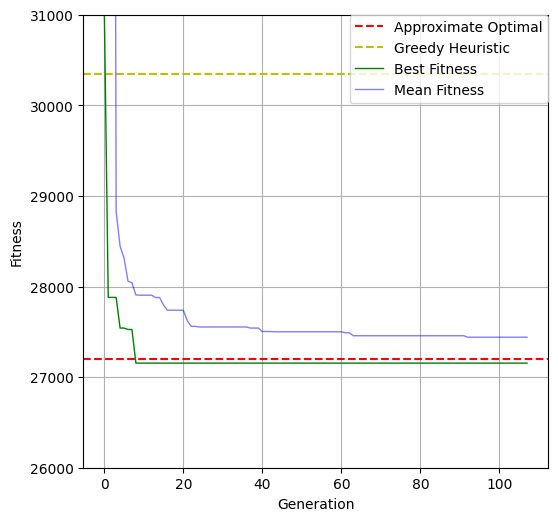

In [420]:
from matplotlib import pyplot as plt

def plot_convergence_graph(ga: TSPEvolutionaryAlgorithm, optimal, greedy, limits):
    best_fitnesses = ga.best_history
    mean_fitnesses = ga.mean_history

    fig = plt.figure('Convergence Graph', figsize=(6,6), dpi= 100, facecolor='w', edgecolor='k')
    plt.axhline(y=optimal, color='r', linestyle='--')
    plt.axhline(y=greedy, color='y', linestyle='--')
    plt.plot(best_fitnesses, 'g', alpha=1, lw=1)
    plt.plot(mean_fitnesses, 'b', alpha=0.5, lw=1)
    plt.plot(0, best_fitnesses[0], 'gx')
    plt.plot(0, mean_fitnesses[0], 'bx')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.legend(['Approximate Optimal', 'Greedy Heuristic', 'Best Fitness', 'Mean Fitness'],
               bbox_to_anchor=(1, 1), loc=1, borderaxespad=0)

    plt.grid(True)
    plt.ylim(limits)
    plt.show()

plot_convergence_graph(ga, 
                       optimal=benchmarks[dataset_idx][0], 
                       greedy=benchmarks[dataset_idx][1],
                       limits=limits[dataset_idx])

## 2. Best Tour Length and Best Sequence of Cities

In [211]:
print(f'Best solution:\n\tfitness = {ga.best_solution.fitness}')
print(f'\troute = {ga.best_solution.route}')

Best solution:
	fitness = 27154.48839924464
	route = [17, 18, 14, 11, 10, 9, 5, 0, 1, 4, 7, 3, 2, 6, 8, 12, 13, 15, 23, 24, 26, 19, 25, 27, 28, 22, 21, 20, 16]


## 3. Results Interpretation 

## 4. Histogram of Best and Mean Fitnesses for 1000 iterations (only for tour29)

In [ ]:
dataset_idx = 0
file = open('datasets/' + datasets[dataset_idx])
distance_matrix = np.loadtxt(file, delimiter=",")
file.close()

best_fitnesses = []
mean_fitnesses = []

while len(best_fitnesses) < 1000:
    reporter = Reporter(datasets[dataset_idx][:-4] + f'_{iter}')
    ga = TSPEvolutionaryAlgorithm(distance_matrix, lambda_=10, mu=5, k=3,
                                  recombination_probability=0.9,
                                  mutation_probability=0.1,
                                  local_search_probability=1,#0.3,
                                  mutation_strength=3,
                                  fitness_sharing_alpha=1,
                                  fitness_sharing_sigma=len(distance_matrix)//10)

    while not ga.converged(max_iterations=50):
        ga.update()

        # extract results of current generation
        mean_objective = ga.mean_objective
        best_objective = ga.best_objective
        best_solution = ga.best_solution
#         time_left = reporter.report(mean_objective,
#                                     best_objective,
#                                     best_solution)
        

    best_fitnesses.append(best_objective)
    mean_fitnesses.append(mean_objective)
    print(f'#{len(best_fitnesses)} converged!')

print(best_solution.route)

Reached maximum number of iterations
#1 converged!
Reached maximum number of iterations
#2 converged!
Reached maximum number of iterations
#3 converged!
Reached maximum number of iterations
#4 converged!
Reached maximum number of iterations
#5 converged!
Reached maximum number of iterations
#6 converged!
Reached maximum number of iterations
#7 converged!
Reached maximum number of iterations
#8 converged!
Reached maximum number of iterations
#9 converged!
Reached maximum number of iterations
#10 converged!
Reached maximum number of iterations
#11 converged!
Reached maximum number of iterations
#12 converged!
Reached maximum number of iterations
#13 converged!
Reached maximum number of iterations
#14 converged!
Reached maximum number of iterations
#15 converged!
Reached maximum number of iterations
#16 converged!
Reached maximum number of iterations
#17 converged!
Reached maximum number of iterations
#18 converged!
Reached maximum number of iterations
#19 converged!
Reached maximum numbe

Reached maximum number of iterations
#158 converged!
Reached maximum number of iterations
#159 converged!
Reached maximum number of iterations
#160 converged!
Reached maximum number of iterations
#161 converged!
Reached maximum number of iterations
#162 converged!
Reached maximum number of iterations
#163 converged!
Reached maximum number of iterations
#164 converged!
Reached maximum number of iterations
#165 converged!
Reached maximum number of iterations
#166 converged!
Reached maximum number of iterations
#167 converged!
Reached maximum number of iterations
#168 converged!
Reached maximum number of iterations
#169 converged!
Reached maximum number of iterations
#170 converged!
Reached maximum number of iterations
#171 converged!
Reached maximum number of iterations
#172 converged!
Reached maximum number of iterations
#173 converged!
Reached maximum number of iterations
#174 converged!
Reached maximum number of iterations
#175 converged!
Reached maximum number of iterations
#176 conv

Reached maximum number of iterations
#313 converged!
Reached maximum number of iterations
#314 converged!
Reached maximum number of iterations
#315 converged!
Reached maximum number of iterations
#316 converged!
Reached maximum number of iterations
#317 converged!
Reached maximum number of iterations
#318 converged!
Reached maximum number of iterations
#319 converged!
Reached maximum number of iterations
#320 converged!
Reached maximum number of iterations
#321 converged!
Reached maximum number of iterations
#322 converged!
Reached maximum number of iterations
#323 converged!
Reached maximum number of iterations
#324 converged!
Reached maximum number of iterations
#325 converged!
Reached maximum number of iterations
#326 converged!
Reached maximum number of iterations
#327 converged!
Reached maximum number of iterations
#328 converged!
Reached maximum number of iterations
#329 converged!
Reached maximum number of iterations
#330 converged!
Reached maximum number of iterations
#331 conv

Reached maximum number of iterations
#468 converged!
Reached maximum number of iterations
#469 converged!
Reached maximum number of iterations
#470 converged!
Reached maximum number of iterations
#471 converged!
Reached maximum number of iterations
#472 converged!
Reached maximum number of iterations
#473 converged!
Reached maximum number of iterations
#474 converged!
Reached maximum number of iterations
#475 converged!
Reached maximum number of iterations
#476 converged!
Reached maximum number of iterations
#477 converged!
Reached maximum number of iterations
#478 converged!
Reached maximum number of iterations
#479 converged!
Reached maximum number of iterations
#480 converged!
Reached maximum number of iterations
#481 converged!
Reached maximum number of iterations
#482 converged!
Reached maximum number of iterations
#483 converged!
Reached maximum number of iterations
#484 converged!
Reached maximum number of iterations
#485 converged!
Reached maximum number of iterations
#486 conv

Reached maximum number of iterations
#623 converged!
Reached maximum number of iterations
#624 converged!
Reached maximum number of iterations
#625 converged!
Reached maximum number of iterations
#626 converged!
Reached maximum number of iterations
#627 converged!
Reached maximum number of iterations
#628 converged!
Reached maximum number of iterations
#629 converged!
Reached maximum number of iterations
#630 converged!
Reached maximum number of iterations
#631 converged!
Reached maximum number of iterations
#632 converged!
Reached maximum number of iterations
#633 converged!
Reached maximum number of iterations
#634 converged!
Reached maximum number of iterations
#635 converged!
Reached maximum number of iterations
#636 converged!
Reached maximum number of iterations
#637 converged!
Reached maximum number of iterations
#638 converged!
Reached maximum number of iterations
#639 converged!
Reached maximum number of iterations
#640 converged!
Reached maximum number of iterations
#641 conv

Reached maximum number of iterations
#778 converged!
Reached maximum number of iterations
#779 converged!
Reached maximum number of iterations
#780 converged!
Reached maximum number of iterations
#781 converged!
Reached maximum number of iterations
#782 converged!
Reached maximum number of iterations
#783 converged!
Reached maximum number of iterations
#784 converged!
Reached maximum number of iterations
#785 converged!
Reached maximum number of iterations
#786 converged!
Reached maximum number of iterations
#787 converged!
Reached maximum number of iterations
#788 converged!
Reached maximum number of iterations
#789 converged!
Reached maximum number of iterations
#790 converged!
Reached maximum number of iterations
#791 converged!
Reached maximum number of iterations
#792 converged!
Reached maximum number of iterations
#793 converged!
Reached maximum number of iterations
#794 converged!
Reached maximum number of iterations
#795 converged!
Reached maximum number of iterations
#796 conv

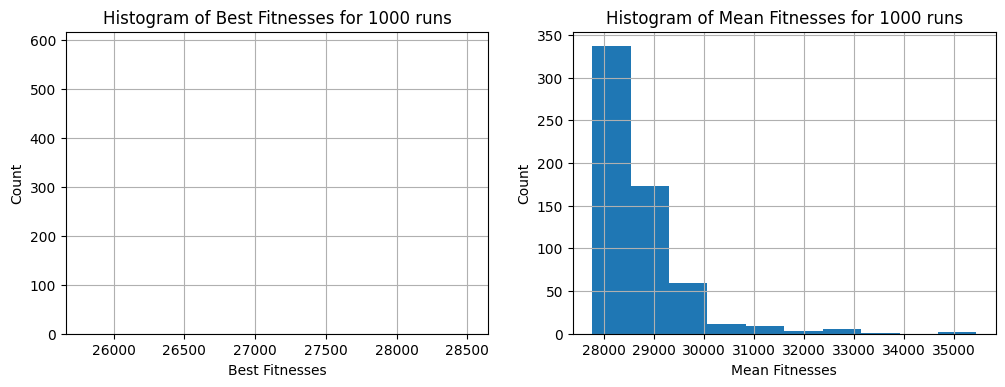

Best fitness mean=27154.488399244645, std=3.5983515469119183e-12
Mean fitness mean=28710.765180012386, std=867.2994534135981


In [135]:
from matplotlib import pyplot as plt

def plot_histograms(best_fitnesses, mean_fitnesses):
    fig = plt.figure('Histograms of 1000 runs', figsize=(12,4), dpi= 100, facecolor='w', edgecolor='k')
    fig.add_subplot(1, 2, 1)
    fig.add_subplot(1, 2, 2)
    ax = fig.axes
    labels = ['Best Fitnesses', 'Mean Fitnesses']

    for idx in range(2):
        ax[idx].set_xlabel(labels[idx])
        ax[idx].set_ylabel("Count")
        ax[idx].set_title(f'Histogram of {labels[idx]} for 1000 runs')
        ax[idx].grid(True)
        ax[idx].hist([best_fitnesses, mean_fitnesses][idx], bins=10)

    plt.show()
    
""" Plot the histograms """
plot_histograms(best_fitnesses, mean_fitnesses)

best_mean = np.mean(best_fitnesses)
best_std = np.std(best_fitnesses)

mean_mean = np.mean(mean_fitnesses)
mean_std = np.std(mean_fitnesses)

print(f'Best fitness mean={best_mean}, std={best_std}')
print(f'Mean fitness mean={mean_mean}, std={mean_std}')